In [10]:
from GGS.ggs import *
import numpy as np
import matplotlib.pyplot as plt
from utils.index_data import index_data

In [2]:
# Read in daily log returns from 1997-2015 of 10 indices:
# DM stocks, EM stocks, Real estate, Oil, Gold, HY bonds, EM HY bonds, GVT bonds, CORP bonds, IFL bonds
filename = "Data/Returns.txt"
data = np.genfromtxt(filename,delimiter=' ')
# Select DM stocks, Oil, and GVT bonds
feats = [0,3,7]

In [3]:
data = data.T #Convert to an n-by-T matrix

In [4]:
data

array([[-7.70893134e-03,  6.61430310e-03,  2.51530822e-03, ...,
         9.27858268e-03, -5.40392815e-03, -8.14417537e-03],
       [-4.61986403e-04,  5.57930435e-03,  7.30306372e-03, ...,
        -6.95526605e-04, -1.03321969e-02,  3.37424044e-03],
       [-1.32153534e-02, -1.83108099e-03,  8.15299487e-03, ...,
         9.05293117e-03, -2.78165072e-03, -8.09221238e-03],
       ...,
       [-4.78024183e-03,  1.22154582e-03, -8.31688112e-04, ...,
        -1.91069884e-03, -4.96056352e-05,  1.19536192e-03],
       [-5.81979188e-03,  1.31063939e-03, -6.01972363e-04, ...,
        -5.59555841e-03,  1.24486606e-03,  2.18549519e-03],
       [-6.66616962e-03,  9.48856890e-04, -1.29320362e-03, ...,
        -2.30432686e-03, -3.56978541e-03,  3.55204180e-03]])

In [5]:
bps, objectives = GGS(data, Kmax = 10, lamb = 1e-4, features = feats)

In [6]:
# Find means and covariances of the segments, given the selected breakpoints
bp10 = bps[10] # Get breakpoints for K = 10
bp10

[0, 208, 458, 1389, 1643, 1976, 2736, 3044, 3187, 4057, 4659, 4944]

In [7]:
meancovs = GGSMeanCov(data, breakpoints = bp10, lamb = 1e-4, features = feats)

In [8]:
print("Breakpoints are at", bps)
print("Objectives are", objectives)

Breakpoints are at [[0, 4944], [0, 3035, 4944], [0, 3037, 3187, 4944], [0, 3037, 3187, 4659, 4944], [0, 3037, 3187, 4057, 4659, 4944], [0, 1658, 3037, 3187, 4057, 4659, 4944], [0, 1757, 2736, 3044, 3187, 4057, 4659, 4944], [0, 208, 1757, 2736, 3044, 3187, 4057, 4659, 4944], [0, 208, 1389, 1658, 2744, 3044, 3187, 4057, 4659, 4944], [0, 208, 1389, 1643, 1976, 2736, 3044, 3187, 4057, 4659, 4944], [0, 208, 458, 1389, 1643, 1976, 2736, 3044, 3187, 4057, 4659, 4944]]
Objectives are [146726.29558438572, 147257.91025022147, 148357.6796225891, 148733.71033653826, 149088.1014570355, 149343.9555248909, 149595.3344487291, 149811.39361878132, 149930.66944821613, 150010.55122528473, 150070.1622079874]


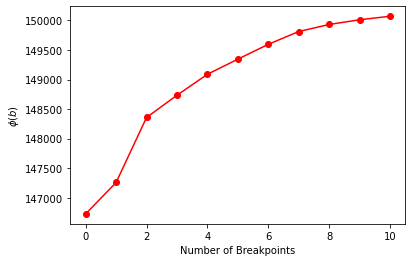

In [9]:
# Plot objective vs. number of breakpoints
plotVals = range(len(objectives))
plt.plot(plotVals, objectives, 'or-')
plt.xlabel('Number of Breakpoints')
plt.ylabel(r'$\phi(b)$')
plt.show()

In [19]:
data_setting = {
    'start' : '1992-01-01',
    'end'   : '2021-06-30',
    'rebal_period':'1M'
}

data = index_data(**data_setting)
return_df = data.index_data_loading()

In [20]:
return_df.head()

,msci_acwi,msci_world,msci_emerging,msci_world_gross,msci_world_value,msci_real_estate,bb_world_agg,bb_emerging_agg,bb_corp_ig,bb_corp_hy,bb_infla_protect,snp_commodity
1992-01-31,0.000000,0.000000,0.000000,-0.031464,-0.009100,0.0,-0.002171,0.0,-0.002588,0.035225,0.0,0.005368
1992-02-29,-0.017548,-0.020678,0.103012,-0.023750,-0.014170,0.0,-0.013095,0.0,-0.012103,0.024673,0.0,0.025628
1992-03-31,-0.015102,-0.017357,0.054748,-0.048605,-0.049508,0.0,0.003074,0.0,0.006558,0.012399,0.0,-0.023659
1992-04-30,-0.063123,-0.066034,0.029763,-0.011712,0.035704,0.0,0.003851,0.0,0.005622,0.003798,0.0,0.030560
1992-05-31,0.026335,0.027579,-0.009451,0.042249,0.033392,0.0,0.006528,0.0,0.004180,0.014110,0.0,0.023145


In [21]:
return_df = return_df.T
_return_df = np.array(return_df)
_return_df

array([[ 0.        , -0.01754782, -0.01510157, ...,  0.01483923,
         0.03356504,  0.01485831],
       [ 0.        , -0.02067767, -0.01735681, ...,  0.02029314,
         0.03819463,  0.01131018],
       [ 0.        ,  0.10301247,  0.05474808, ..., -0.01998576,
         0.00273359,  0.03880827],
       ...,
       [ 0.0352255 ,  0.02467317,  0.01239892, ...,  0.00070752,
         0.01015656,  0.0026823 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.0007054 ,
         0.01747657,  0.008917  ],
       [ 0.00536804,  0.0256284 , -0.02365889, ...,  0.00145341,
         0.07517119,  0.03498576]])

In [24]:
feats = [1,2,5,6,11]

In [28]:
bps, objectives = GGS(_return_df, Kmax = 10, lamb = 1e-4, features = feats)

In [29]:
bp10 = bps[10] # Get breakpoints for K = 10
bp10

[0, 97, 138, 186, 199, 202, 207, 218, 248, 339, 342, 355]

In [31]:
meancovs = GGSMeanCov(_return_df, breakpoints = bp10, lamb = 1e-4, features = feats)

In [32]:
print("Breakpoints are at", bps)
print("Objectives are", objectives)

Breakpoints are at [[0, 355], [0, 97, 355], [0, 97, 210, 355], [0, 97, 202, 210, 355], [0, 97, 202, 210, 339, 355], [0, 97, 138, 201, 210, 339, 355], [0, 97, 138, 186, 202, 210, 339, 355], [0, 97, 138, 186, 202, 210, 339, 342, 355], [0, 97, 138, 186, 202, 210, 248, 339, 342, 355], [0, 97, 138, 186, 202, 207, 218, 248, 339, 342, 355], [0, 97, 138, 186, 199, 202, 207, 218, 248, 339, 342, 355]]
Objectives are [12195.553385804193, 13069.078029955916, 13188.371094112845, 13312.727946566116, 13382.245063684384, 13446.889517750025, 13508.172325165642, 13572.421010725038, 13627.889860383377, 13674.52772810363, 13729.085433654804]
